# This program is for Predicting the Loan Status (Problem-1)

Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online
application form.

The details filled by the customer are Gender, Marital Status, Education, Number of Dependents,
Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others.

The requirements are as follows:

1)Check eligibility of the Customer given the inputs described above.(Classification)

   If customer is not eligible for the input required amount and duration:

2) what can be amount for the given duration.(Regression)

3) if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration?
   What is that duration?(Regression)

# Import Libraries 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Read training and testing dataset

In [3]:
tr_A=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/training_set.csv")
tr_A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
ts_A=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/testing_set.csv")
ts_A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# check dataframe profile

In [5]:
ts_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# check missing data in dataframe

In [6]:
tr_A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
ts_A.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# cheking the column profile for repetataion of values

In [8]:
tr_A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# dropping the discrete column, Loan_ID

In [9]:
tr_B=tr_A.drop(labels=["Loan_ID"],axis=1)
ts_B=ts_A.drop(labels=["Loan_ID"],axis=1)

# Creating list of catagorical and continious columns

values less than 10 are considered as Catagorical columns and

values greater than 10 are considered Continuous columns

In [10]:
cat = []
con = []
for i in tr_B.columns:
    if (tr_B[i].nunique()<10):
        cat.append(i)
    else:
        con.append(i)
cat.remove("Loan_Status")
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Credit_History',
  'Property_Area'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

# Missing data treatment

fill missing data of catagorical coulmns by mode values of respective column

fill missing data of continuous columns by mean values of the respective columns

In [11]:
for i in cat:
    x=tr_B[i].mode()[0]
    tr_B[i]=tr_B[i].fillna(x)
    ts_B[i]=ts_B[i].fillna(x)

In [12]:
for i in con:
    x=tr_B[i].mean()
    tr_B[i]=tr_B[i].fillna(x)
    ts_B[i]=ts_B[i].fillna(x)   

In [13]:
tr_B.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
ts_B.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Check the outliers in the data

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1=pd.DataFrame(ss.fit_transform(tr_B[con]),columns=con)
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072651,-0.554368,0.000000,0.279851
1,0.000000,-0.038610,-0.219273,0.279851
2,-0.394096,-0.554368,-0.957641,0.279851
3,-0.462412,0.252103,-0.314547,0.279851
4,0.097389,-0.554368,-0.064454,0.279851


In [16]:
out = []
for i in con:
     out=out+list(x1[(x1[i]>3)|(x1[i]<-3)].index)

In [17]:
out=list(np.unique(out))
out

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

# Drop all outliers from the data

In [18]:
tr_C=tr_B.drop(index=out,axis=0)

# Reindexing the dataframe after deleting outliers

In [19]:
tr_C.index=range(0,tr_C.shape[0],1)

# Check the distribution of continuous columns
plot histograms or disturibution plot

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

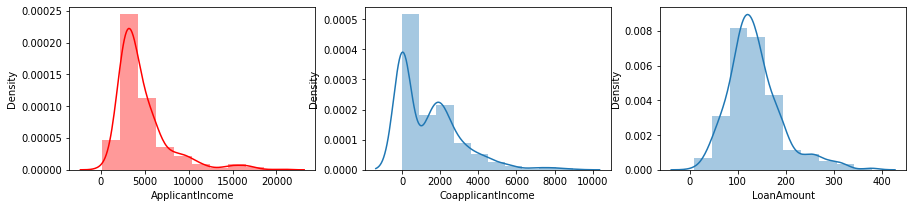

In [20]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sb.distplot(tr_C["ApplicantIncome"],bins=10,color="red")
plt.subplot(1,3,2)
sb.distplot(tr_C["CoapplicantIncome"],bins=10)
plt.subplot(1,3,3)
sb.distplot(tr_C["LoanAmount"],bins=10)

#From the plots it is observed that all columns show approximately normal distribution but skewed slightly towards right side

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

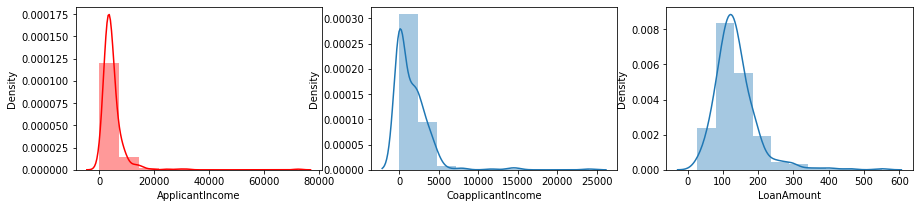

In [21]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sb.distplot(ts_B["ApplicantIncome"],bins=10,color="red")
plt.subplot(1,3,2)
sb.distplot(ts_B["CoapplicantIncome"],bins=10)
plt.subplot(1,3,3)
sb.distplot(ts_B["LoanAmount"],bins=10)

# Check the skewness of all continuous columns

In [22]:
for i in con:
    print(i,tr_C[i].skew())

ApplicantIncome 2.145688077185856
CoapplicantIncome 1.351358890837548
LoanAmount 1.1131318857924217
Loan_Amount_Term -2.077031480435139


In [23]:
for i in con:
    print(i,ts_B[i].skew())

ApplicantIncome 8.441374954190996
CoapplicantIncome 4.257356934477602
LoanAmount 2.2305371080983596
Loan_Amount_Term -2.7008924966629455


# Removing the skewness
To remove skewness, take the log trasnformation of all continous columns.
in Coapplican income column there are some values which are zero. Log of zero is not possible so before taking log replace zero values with small number 1 or 0.1 

In [24]:
tr_D=tr_C # copy the dataframe for the transformation
ts_D=ts_B

In [25]:
for i in con:
    if i!="Loan_Amount_Term":
        tr_D[i]=tr_D[i].replace({0:1})
        ts_D[i]=ts_D[i].replace({0:1})  

In [26]:
for i in con:
    if i!="Loan_Amount_Term":
        tr_D[i]=np.log(tr_D[i])
        ts_D[i]=np.log(ts_D[i])

In [27]:
for i in con:
    print(i,tr_D[i].skew(),ts_D[i].skew())

ApplicantIncome -0.20969781631644963 -5.25720324127368
CoapplicantIncome -0.2166071855855629 -0.24688868882529807
LoanAmount -0.7406162296042765 -0.26487768185667065
Loan_Amount_Term -2.077031480435139 -2.7008924966629455


# Declare dependent 'Y' and independent 'X' variables 

In [28]:
Y=tr_C[["Loan_Status"]]
X=tr_C.drop(labels=["Loan_Status"],axis=1)

# checking the relation if dependent and independent variables

# Catagorical to Continiuos relation - Annova test

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
col_to_drop = []

for i in con:
    rel = i +" ~ "+"Loan_Status"
    model=ols(rel,tr_C).fit()
    Q=anova_lm(model)
    pval=Q.iloc[0:1,4][0]
    print("Loan_Status v/s ",i,"--->",pval)

Loan_Status v/s  ApplicantIncome ---> 0.9554975041974758
Loan_Status v/s  CoapplicantIncome ---> 0.05068290349096325
Loan_Status v/s  LoanAmount ---> 0.5794207610065045
Loan_Status v/s  Loan_Amount_Term ---> 0.6636212713375147


# catagorical to catogorical replation - Chisquare Test

In [30]:
from scipy.stats import chi2_contingency
for i in cat:
    Q=pd.crosstab(tr_C["Loan_Status"],tr_C[i])
    a,pval,c,d=chi2_contingency(Q)
    if pval>0.5:
        col_to_drop.append(i)
    print("Loan_Status v/s ",i,"--->",pval)

Loan_Status v/s  Gender ---> 0.7623575001800956
Loan_Status v/s  Married ---> 0.04093872592584048
Loan_Status v/s  Dependents ---> 0.5826451238806551
Loan_Status v/s  Education ---> 0.03414825953694172
Loan_Status v/s  Self_Employed ---> 0.6158136683554956
Loan_Status v/s  Credit_History ---> 1.2202246893922684e-40
Loan_Status v/s  Property_Area ---> 0.0023192782270974365


In [31]:
col_to_drop

['Gender', 'Dependents', 'Self_Employed']

In [32]:
X=tr_D.drop(labels=col_to_drop,axis=1)
X_ts=ts_D.drop(labels=col_to_drop,axis=1)

In [33]:
cat.remove("Gender")
cat.remove("Self_Employed")
cat.remove("Dependents")

# Standradize the data
create one hot encoding for the catagorical columns

scale the continuous valeus in the range of 0 to 1

In [34]:
X1=pd.get_dummies(X[cat],columns=cat)
X1.head()

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0,1,0,0,1
1,0,1,1,0,0,1,1,0,0
2,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,0,0,1
4,1,0,1,0,0,1,0,0,1


In [35]:
X1_ts=pd.get_dummies(X_ts[cat],columns=cat)
X1_ts.head()

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0,1
2,0,1,1,0,0,1,0,0,1
3,0,1,1,0,0,1,0,0,1
4,1,0,0,1,0,1,0,0,1


In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X2= pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.743736,0.000000,0.745189,0.6
1,0.727729,0.803992,0.709282,0.6
2,0.608189,0.000000,0.532316,0.6
3,0.577805,0.853101,0.692040,0.6
4,0.748911,0.000000,0.735125,0.6


In [37]:
X2_ts= pd.DataFrame(mm.transform(X_ts[con]),columns=con)
X2_ts.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.739209,0.000000,0.668793,0.6
1,0.613268,0.803407,0.705075,0.6
2,0.711896,0.823437,0.838995,0.6
3,0.557747,0.861528,0.643329,0.6
4,0.626057,0.000000,0.576948,0.6


# create new data frame combining both catagoriacal one hot encoded dataframe and scaled continous columns dataframe

In [38]:
Xnew =X1.join(X2)
Xnew.head()

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,1,0,0,1,0,0,1,0.743736,0.000000,0.745189,0.6
1,0,1,1,0,0,1,1,0,0,0.727729,0.803992,0.709282,0.6
2,0,1,1,0,0,1,0,0,1,0.608189,0.000000,0.532316,0.6
3,0,1,0,1,0,1,0,0,1,0.577805,0.853101,0.692040,0.6
4,1,0,1,0,0,1,0,0,1,0.748911,0.000000,0.735125,0.6


In [39]:
Xnew_ts =X1_ts.join(X2_ts)
Xnew_ts.head()

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,1,0,0,1,0,0,1,0.739209,0.000000,0.668793,0.6
1,0,1,1,0,0,1,0,0,1,0.613268,0.803407,0.705075,0.6
2,0,1,1,0,0,1,0,0,1,0.711896,0.823437,0.838995,0.6
3,0,1,1,0,0,1,0,0,1,0.557747,0.861528,0.643329,0.6
4,1,0,0,1,0,1,0,0,1,0.626057,0.000000,0.576948,0.6


# Divide this dataset into training and testing dataset
using test size = 0.2
    randam state as 42

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=42)

#As this is classification problem , we will check differnt classifer for this dataset.

whichever calssifier gives best results will be used for final traing

we will try following classifiers
1) Logistic regession

2) Decision Tree

3) k-nearest neighbour

4) Random forest

5) decision tree with Adaboost regressor

# Function for calculating accuracy score of the model

In [41]:
def acc_score(obj):
    
    model = obj.fit(xtrain,ytrain)
    
    tr_pred = model.predict(xtrain)
    ts_pred= model.predict(xtest)
    
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain, tr_pred)
    ts_acc = accuracy_score(ytest, ts_pred)
    
    return tr_acc,ts_acc

# Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_1=LogisticRegression( penalty='l1',solver='saga')
lr_2=LogisticRegression( penalty='none',solver='lbfgs')

In [43]:
acc_score(lr)

(0.8156182212581344, 0.8275862068965517)

In [44]:
acc_score(lr_1)

(0.8156182212581344, 0.8275862068965517)

In [45]:
acc_score(lr_2)

(0.8156182212581344, 0.8275862068965517)

# K-Nearest neighbour

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10,n_jobs=500)

In [47]:
acc_score(knc)

(0.8047722342733189, 0.7844827586206896)

# Decision Tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier(criterion="gini")
dtc_2 = DecisionTreeClassifier(criterion="entropy")

In [49]:
acc_score(dtc_1)

(1.0, 0.7413793103448276)

In [50]:
acc_score(dtc_2)

(1.0, 0.8017241379310345)

In [51]:
for i in range(2,30):
    dtc_3=DecisionTreeClassifier(max_depth=i)
    print(i,acc_score(dtc_3))

2 (0.8199566160520607, 0.8103448275862069)
3 (0.824295010845987, 0.8189655172413793)
4 (0.8351409978308026, 0.8103448275862069)
5 (0.8481561822125814, 0.8017241379310345)
6 (0.8655097613882863, 0.8103448275862069)
7 (0.8720173535791758, 0.7672413793103449)
8 (0.8893709327548807, 0.7844827586206896)
9 (0.9219088937093276, 0.7586206896551724)
10 (0.9349240780911063, 0.7327586206896551)
11 (0.9544468546637744, 0.7327586206896551)
12 (0.9674620390455532, 0.7327586206896551)
13 (0.982646420824295, 0.7327586206896551)
14 (0.9913232104121475, 0.7586206896551724)
15 (0.9978308026030369, 0.7241379310344828)
16 (1.0, 0.7413793103448276)
17 (1.0, 0.7413793103448276)
18 (1.0, 0.7327586206896551)
19 (1.0, 0.7672413793103449)
20 (1.0, 0.7155172413793104)
21 (1.0, 0.75)
22 (1.0, 0.7327586206896551)
23 (1.0, 0.7241379310344828)
24 (1.0, 0.7241379310344828)
25 (1.0, 0.7413793103448276)
26 (1.0, 0.6982758620689655)
27 (1.0, 0.7155172413793104)
28 (1.0, 0.7155172413793104)
29 (1.0, 0.7327586206896551)


In [52]:
for i in range(2,10):
    dtc_4=DecisionTreeClassifier(min_samples_split=i)
    print(i,acc_score(dtc_3))

2 (1.0, 0.7586206896551724)
3 (1.0, 0.7155172413793104)
4 (1.0, 0.7155172413793104)
5 (1.0, 0.75)
6 (1.0, 0.7241379310344828)
7 (1.0, 0.7327586206896551)
8 (1.0, 0.7327586206896551)
9 (1.0, 0.7327586206896551)


In [53]:
for i in range(2,30):
    dtc_5=DecisionTreeClassifier(max_leaf_nodes=i)
    print(i,acc_score(dtc_3))

2 (1.0, 0.7241379310344828)
3 (1.0, 0.7413793103448276)
4 (1.0, 0.75)
5 (1.0, 0.75)
6 (1.0, 0.7327586206896551)
7 (1.0, 0.7327586206896551)
8 (1.0, 0.7327586206896551)
9 (1.0, 0.7672413793103449)
10 (1.0, 0.7068965517241379)
11 (1.0, 0.7327586206896551)
12 (1.0, 0.75)
13 (1.0, 0.75)
14 (1.0, 0.75)
15 (1.0, 0.7241379310344828)
16 (1.0, 0.7155172413793104)
17 (1.0, 0.7672413793103449)
18 (1.0, 0.7413793103448276)
19 (1.0, 0.75)
20 (1.0, 0.7413793103448276)
21 (1.0, 0.7586206896551724)
22 (1.0, 0.7413793103448276)
23 (1.0, 0.7413793103448276)
24 (1.0, 0.7586206896551724)
25 (1.0, 0.7327586206896551)
26 (1.0, 0.75)
27 (1.0, 0.6982758620689655)
28 (1.0, 0.75)
29 (1.0, 0.75)


# tuning the decision tree model for best parameters

In [54]:
tg = {
    "criterion" : ["gini","entropy"],
    "max_depth" : range(2,20,1),
    "min_samples_split" : range(2,20,1),
    "max_leaf_nodes" : range(2,20,1)
    }

In [ ]:
dtc_6=DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc_6,tg,cv=5,n_jobs=100,scoring="accuracy")

In [ ]:
#cv.fit(xtrain,ytrain)
#cv.best_estimator_,cv.best_score_,cv.best_params_

In [ ]:
#import sklearn.metrics
#sklearn.metrics.get_scorer_names()

# Randoam forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [56]:
acc_score(rfc)

(1.0, 0.8275862068965517)

# Adaboost classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",max_depth=2,random_state=42),n_estimators=500,random_state=42)

In [60]:
acc_score(abc)

(1.0, 0.7586206896551724)

# Boosting different alogs for better test accuracy

In [61]:
abc_2=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=2),n_estimators=500,random_state=42)

In [62]:
acc_score(abc_2)

(1.0, 0.7844827586206896)

In [63]:
abc_3=AdaBoostClassifier(base_estimator=rfc,n_estimators=500,random_state=42)

In [64]:
acc_score(abc_3)

(1.0, 0.8189655172413793)

In [65]:
abc_4=AdaBoostClassifier(base_estimator=lr,n_estimators=500,random_state=42)
acc_score(abc_4)

(0.8156182212581344, 0.8275862068965517)

# Selecting Best Model

By comparing accuracy of different models, it seems Logistic regression model with Adaboostregressor gives best traing and testing accuracy score

In [66]:
abc_5=AdaBoostClassifier(base_estimator=lr,n_estimators=500)

In [67]:
final_model=abc_5.fit(Xnew,Y)

In [68]:
final_model.score(Xnew,Y)

0.8180242634315424

# Deleting the unwanted columns form testing data set

In [69]:
drop_col = []
for i in Xnew_ts.columns:
    if (i not in Xnew.columns):
        drop_col.append(i)    

In [70]:
drop_col

[]

In [71]:
add_col = []
for i in Xnew.columns:
    if (i not in Xnew_ts.columns):
        add_col.append(i)    
add_col

[]

In [72]:
Xnew_ts=Xnew_ts.drop(labels=drop_col,axis=1)

In [73]:
pred= final_model.predict(Xnew_ts)

In [74]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [75]:
Predictions = ts_A[["Loan_ID"]]

In [76]:
Predictions["Loan_Status"]=pred
Predictions

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [77]:
Predictions.to_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/Loan_Status_prediction_LR.csv")